<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span><ul class="toc-item"><li><span><a href="#Признаки:" data-toc-modified-id="Признаки:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Признаки:</a></span></li><li><span><a href="#Целевой-признак:" data-toc-modified-id="Целевой-признак:-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Целевой признак:</a></span></li></ul></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Общие-выводы-по-предоставленным-данным" data-toc-modified-id="Общие-выводы-по-предоставленным-данным-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Общие выводы по предоставленным данным</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**Для решения поставленной задачи будем придерживаться следующих этапов:**
- Загрузим и изучим данные.
- Ответим на вопрос и обоснуем решение. 
    - Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
    - a. Изменится. Приведем примеры матриц.
    - b. Не изменится. Укажем, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
- Предложим алгоритм преобразования данных для решения задачи. Обоснуем, почему качество линейной регрессии не поменяется.
- Запрограммируем этот алгоритм, применив матричные операции. Проверим, что качество линейной регрессии из sklearn не отличается до и после преобразования. Применим метрику R2.

## Описание данных

Набор данных находится в файле /datasets/insurance.csv. Скачать датасет.

### Признаки: 
- пол, возраст и зарплата застрахованного, количество членов его семьи.

### Целевой признак:
- количество страховых выплат клиенту за последние 5 лет.

In [1]:
# для решения задачи подключим необходимые библиотеки
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

## Загрузка данных

In [2]:
data = pd.read_csv('/datasets/insurance.csv')

In [3]:
display(data)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


In [4]:
#выведем общую информацию по датасету, а также отдельно количество строк и столбцов
data.info()
print(f'Количество строк {data.shape[0]} и столбцов {data.shape[1]}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
Количество строк 5000 и столбцов 5


Для удобства следует привести данные столбцов возраст и зарплата к целочисленному типу данных, то есть перевести из float в int.

In [5]:
data = data.astype({'Возраст' : 'int64', 'Зарплата' : 'int64'})
display(data)
data.dtypes

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41,49600,1,0
1,0,46,38000,1,1
2,0,29,21000,0,0
3,0,21,41700,2,0
4,1,28,26100,0,0
...,...,...,...,...,...
4995,0,28,35700,2,0
4996,0,34,52400,1,0
4997,0,20,33900,2,0
4998,1,22,32700,3,0


Пол                  int64
Возраст              int64
Зарплата             int64
Члены семьи          int64
Страховые выплаты    int64
dtype: object

In [6]:
#посмотрим есть ли пропуски в данных
data.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [7]:
#убедимся в оствуствии дублирующих строк
print('Количество дублирующих строк', data.duplicated().sum())

Количество дублирующих строк 153


Удалим дублирующие строки из данных.

In [8]:
#удалим дублирующие данные
dat = data.drop_duplicates(inplace=True)
print('Количество дублирующих строк после удаления', data.duplicated().sum())

Количество дублирующих строк после удаления 0


In [9]:
#посмотрим показатели предоставленных данных
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811223,1.203425,0.152259
std,0.500049,8.487995,9972.952441,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


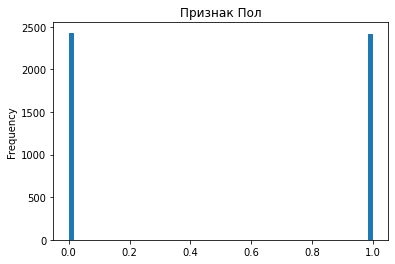

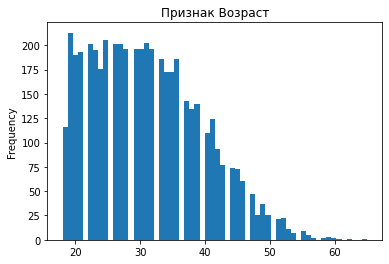

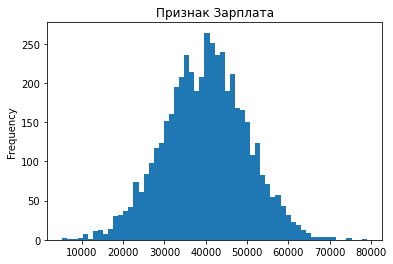

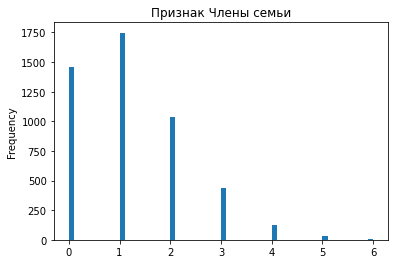

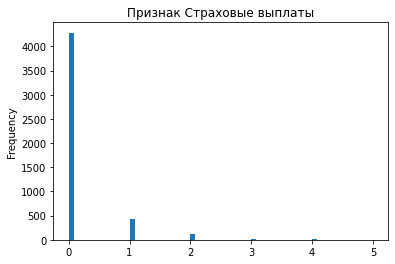

Всего строчек/ количество признаков: 4847


In [10]:
#по каждому столбцу постоим графики для визуализации распределения данных
for col in data.columns:
    plt.figure(figsize=(6, 4))
    data[col].plot(kind='hist', bins=60)
    plt.title(f'Признак {col}')
    plt.show()
print(f'Всего строчек/ количество признаков: {data.shape[0]}')

In [11]:
columns_f = ['Пол', 'Члены семьи', 'Страховые выплаты']
for col in columns_f:
    print('____________________________________________')
    print(col)
    print(data[col].value_counts())

____________________________________________
Пол
0    2431
1    2416
Name: Пол, dtype: int64
____________________________________________
Члены семьи
1    1748
0    1461
2    1038
3     437
4     124
5      32
6       7
Name: Члены семьи, dtype: int64
____________________________________________
Страховые выплаты
0    4284
1     423
2     114
3      18
4       7
5       1
Name: Страховые выплаты, dtype: int64


Посмотрим как признаки влияют друг на друга и на целевой признак.

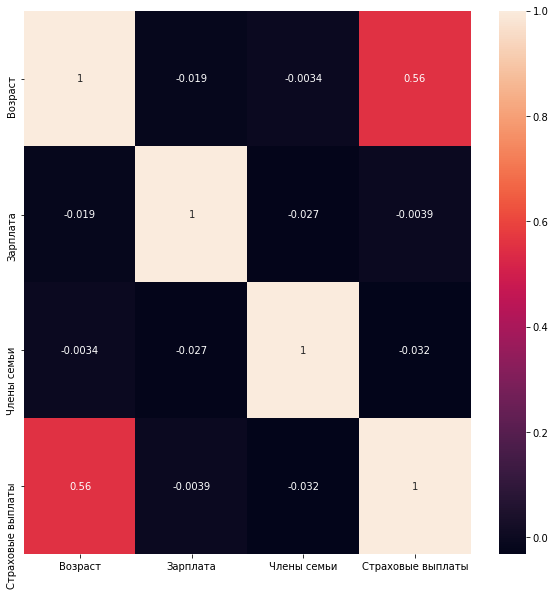

In [12]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.drop(columns='Пол').corr(method = 'spearman'), annot=True)
plt.show()

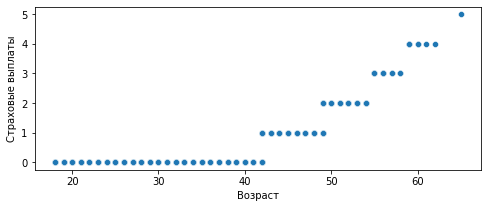

In [13]:
plt.figure(figsize=(8, 3))
sns.scatterplot(x = 'Возраст', y = 'Страховые выплаты', data=data)
plt.show()

##   Общие выводы по предоставленным данным

Загрузили/ открыли файл с данными. Ознакомились с датасетом. Произвели предобработку данных, выявили наличие дублирующих строчек и избавились от них, а также убедились в отсутствии пропусков в  данных. Привели столбцы 'Возраст' и 'Зарплата' к нужному типу данных. Произвели визуализацию данных, построили графики. Посмотрели как признаки коррелируют между собой.

Из предоставленных данных, можно сказать, что возраст человека в большей степени влияет на целевой признак, то есть на страховые выплаты.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
a = X (X^T X)^{-1} X^T y 
$$

- Ответим на вопрос и обоснуем решение.
    - Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
        - a. Изменится. Приведем примеры матриц.
        - b. Не изменится. Укажем, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.


**Предсказания по нашим данным находятся по формуле:**


$$
a = Xw ;
$$

- где X - матрица с признаками;
- w - это вектор весов, коэфициент влияния по признакам, который находится по следующей формуле:


$$
w = (X^T X)^{-1} X^T y ;
$$

- где X - матрица с признаками;
- y - вектор целевого признака.

Задача обучения состоит в нахождении наименьшего/ минимального значения метрики качества MSE, согласно данной формулы:

$$
w = \arg\min_w MSE(Xw, y) .
$$

Общая формула предсказания:

$$
a = Xw = X (X^T X)^{-1} X^T y
$$

**Предположим**, что изначальную матрицу X умножить на обрутную матрицу (назовем её P) и назовем наше предсказание a с индексом 1 (a1), тогда наши формулы примут следующий вид:

$$
a1 = XPw1 ;
$$


- где X - матрица с признаками;
- P - обратная матрица;
- w1 (w с индексом 1) - это вектор весов, коэфициент влияния по признакам и с учетом умножения на обратную матрицу P формула нахождение данного параметра примет следующий вид:


$$
w1 = ((XP)^T XP)^{-1} (XP)^T y ;
$$

- где X - матрица с признаками;
- P - обратная матрица;
- y - вектор целевого признака.

Соберем общую формулу предсказания a1:

$$
a1 = XPw1 = XP((XP)^T XP)^{-1} (XP)^T y 
$$

Попытаемся преобразовать данную формулу, для этого воспользуемся :
- распределительное свойство произведения матриц:

$$
(AB)C = A(BC) ;
$$

- свойства единичной матрицы (E) и обратной матрицы и произведения с ними:

$$
AE = EA = A ;
$$

$$
AA^{-1} = E ;
$$

$$
AA^T = E ;
$$
        - где E - единичная матрица.

- транспонирование матриц:

$$
(AB)^T = B^T A^T;
$$

$$
(A^T)^T = A.
$$

$$
(AB)^{-1} = B^{-1} A^{-1}
$$

Основываясь на данных свойствах преобразуем формулу a1:

- воспользуемся свойствами транспонирования матриц:

$$
a1 = XP (P^T X^T XP)^{-1} P^T X^T y ;
$$

- воспользуемся распределительным свойством матриц при произведении и вынесем P^T из (P^T (X^T XP))^{-1}:

$$
a1 = XP (X^T XP)^{-1} (P^T)^{-1} P^T X^T y ;
$$

- согласно свойствам матриц AA^{-1} = E произведение (P^T)^{-1} и P^T дают матрицу E:

$$
a1 = XP (X^T XP)^{-1} E X^T y ;
$$

- воспользуемся распределительным свойством матриц при произведении и вынесем P из (X^T XP)^{-1}:

$$
a1 = XP P^{-1} (X^T X)^{-1} E X^T y ;
$$

- согласно свойствам матриц AA^{-1} = E произведение в начале формулы P и (P)^{-1} дают матрицу E:

$$
a1 = XE (X^T X)^{-1} E X^T y ;
$$

- согласно свойствам единичной матрицы, при произведении AE = EA = A, поэтому можно не брать в расчет E как коэфициент 1:

$$
a1 = X (X^T X)^{-1} X^T y .
$$

После нескольких преобразований в итоге мы молучили ту же самую формулу, то есть:

$$
a = a1 = X (X^T X)^{-1} X^T y ;
$$

**Ответ:**
Исходя из всего можно сказать, что при умножении матрицы признаков на обрутную матрицу качество линейной регрессии **не изменится**. 

## Алгоритм преобразования

**Алгоритм**

Исходя из сделанных решений попробуем выполнить предсказания применив матричные операции для предоставленных данных. Проверим, что качество линейной регрессии из sklearn не отличается от предоставленных признаков для формулы **a** и после умножения этих признаков на обрутную матрицу, то есть формулы **a1**. Для точности применим метрику R2. 

Применим модель линейной регрессии основных признаков и для преобразованных признаков, то есть признаки умноженные на обратную матрицу.
Вычислим метрики R2 для первой и второй модели.

**Обоснование**

Ранее в теоретических расчетах выявили, что при умножении признаков на обрутную матрицу качество будет неизменным. Для этого сравним метрики R2 для двух моделей.

## Проверка алгоритма

Для обучения модели выделим общие признаки и целевые

In [14]:
features = data.drop(columns='Страховые выплаты')
targets = data['Страховые выплаты']
print(f'Размерность всех данные: строк {data.shape[0]} столбцов {data.shape[1]}')
print(f'Размерность признаков: строк {features.shape[0]} столбцов {features.shape[1]}')
print(f'Размерность целевого признака: строк {targets.shape[0]}')

Размерность всех данные: строк 4847 столбцов 5
Размерность признаков: строк 4847 столбцов 4
Размерность целевого признака: строк 4847


Сразу же сделаем преобразование с признаками, то есть умножим признаки на обратную матрицу.
 
Для этого предварительно сгенерируем новую матрицу. По правилам умножения матриц:

$$
AB = C,
$$ 
- где A - первая матрица;
- B - вторая матрица;
- С - третья матрица, результат произведения двух матриц.

Для того чтобы произвести правильное умножение матриц, должны придерживаться следующего, при умножении матриц количество столбцов матрицы A (размерность k x m) должно соответствовать количеству строк матрицы B (размерностью m x n). Количество столбцов матрицы с признаками равно 4, то есть нужно сгенерировать матрицу B размерностью 4 x 4.

Сгенерируем матрицу B размерностью 4 х 4, применим метод random.

In [15]:
matrix_B = np.random.normal(size=(4, 4))

Выведем полученную матрицу.

In [16]:
matrix_B

array([[ 0.28932008, -1.3463791 ,  0.75372   ,  0.45973672],
       [-0.78150063, -0.22818964,  0.3615833 , -0.56923821],
       [ 0.48223882,  1.63680322,  1.13758606, -0.06794191],
       [-0.76610067, -0.52240292,  0.91908973, -0.32433938]])

Следует преобразовать матрицу B в обратную матрицу, для этого воспользуемся линейной алгеброй из библиотеки numpy метод linalg.inv() 

In [17]:
matrix_B = np.linalg.inv(matrix_B)

Выведем полученную обратную матрицу.

In [18]:
matrix_B

array([[ 1.72781033,  3.38915488,  0.72826013, -3.65166261],
       [-0.81417719, -1.26382323,  0.0980818 ,  1.04349171],
       [ 0.32934158,  0.03032095,  0.38162647,  0.33366945],
       [-1.8365135 , -5.88377892, -0.79672664,  4.80697169]])

Создадим признаки умноженные на обрутную матрицу.

In [19]:
reverse_fetures = features @ matrix_B

Выведем полученные признаки.

In [20]:
reverse_fetures
#reverse

,0,1,2,3
0,16301.852289,1449.607950,18932.625869,16593.942969
1,12475.691291,1088.176611,14505.520950,12732.246522
2,6892.561994,600.089164,8017.000272,7037.319617
3,13712.773044,1226.075943,15914.290122,13945.543149
4,8574.746028,759.379008,9963.925454,8734.338635
...,...,...,...,...
4995,11731.024338,1035.303455,13625.217867,11950.830918
4996,17227.980136,1539.964229,19999.765157,17524.564637
4997,11144.722915,990.836324,12937.505564,11341.877982
4998,10747.775964,949.428908,12479.681495,10944.716940


Создадим класс линейной регрессии LinearRegression.

In [21]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)  # < напишите код здесь >
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

Обучим модель по основным признакам features.

In [22]:
#модель по изначальным/ неизмененным признакам
model = LinearRegression()
model.fit(features, targets)
predictions = model.predict(features)

Обучим модель по измененным признакам reverse_fetures.

In [23]:
#модель по измененным признакам
model_1 = LinearRegression()
model_1.fit(reverse_fetures, targets)
predictions_1 = model_1.predict(reverse_fetures)

Выведем показатель R2 по двум моделям.

In [24]:
print(f'Показатель R2 для основных/ неизмененных признаков: {r2_score(targets, predictions).round(4)}')
print(f'Показатель R2 для измененных признаков: {r2_score(targets, predictions_1).round(4)}')

Показатель R2 для основных/ неизмененных признаков: 0.4302
Показатель R2 для измененных признаков: 0.4302


На практике исходя из полученного результата можно сказать, что качество линейной регрессии не измениться при умножении признаков на обратную матрицу.

In [25]:
# если я правильно понимаю то декодировка данных будет происходить как то так
display(reverse_fetures.dot(np.linalg.inv(matrix_B)).astype('int'))

,0,1,2,3
0,0,40,49600,0
1,0,45,38000,0
2,0,28,21000,0
3,0,20,41700,1
4,0,27,26100,0
...,...,...,...,...
4995,0,27,35700,1
4996,0,33,52400,0
4997,0,19,33900,1
4998,0,21,32700,2


In [26]:
display(features)

,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0
...,...,...,...,...
4995,0,28,35700,2
4996,0,34,52400,1
4997,0,20,33900,2
4998,1,22,32700,3


## Общий вывод

Загрузили/ открыли файл с данными. Ознакомились с датасетом. Произвели предобработку данных, выявили наличие дублирующих строчек и избавились от них, а также убедились в отсутствии пропусков в  данных. Привели столбцы 'Возраст' и 'Зарплата' к нужному типу данных. Произвели визуализацию данных, построили графики. Посмотрели как признаки коррелируют между собой.

В теоретической части доказали неизменность качества модели линейной регрессии при умножении признаков на обратную матрицу. В практической части реализовали модель линейной регрессии, после чего обучили на основных и преобразованных данных. Вывели показатели качества метрикой R2. Сравнили показатель R2 до преобразования и после,  и убедились в том, что качество линейной регрессии не измениться при умножении признаков на обратную матрицу.